In [1]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
import pandas as pd
import numpy as np
import scipy.stats as st

# Setting Up Dataframe

In [2]:
filepath = '../Data/happyVcovid.csv'
df = pd.read_csv(filepath)
df.head()

,country,region,ladder_score,std_err,upperwhisker,lowerwhisker,GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,...,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,95742,969.0,46000.0,48773.0,7.0,17253,175.0,5420876.0,976859.0,5549294
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,293677,2534.0,288190.0,2953.0,12.0,50525,436.0,68626438.0,11806675.0,5812512
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,703004,10891.0,683865.0,8248.0,41.0,80642,1249.0,8306968.0,952897.0,8717589
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,6649,30.0,6596.0,23.0,1.0,19360,87.0,767476.0,2234627.0,343447
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,1685000,17745.0,1631715.0,35540.0,137.0,98121,1033.0,14730069.0,857764.0,17172634


In [3]:
df = df.set_index('country')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, Finland to Afghanistan
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   region                           108 non-null    object 
 1   ladder_score                     108 non-null    float64
 2   std_err                          108 non-null    float64
 3   upperwhisker                     108 non-null    float64
 4   lowerwhisker                     108 non-null    float64
 5   GDP_per_capita                   108 non-null    float64
 6   social_support                   108 non-null    float64
 7   healthy_life_expectancy          108 non-null    float64
 8   freedom_to_make_life_choices     108 non-null    float64
 9   generosity                       108 non-null    float64
 10  perceptions_of_corruption        108 non-null    float64
 11  ladder_score_in_dystopia         108 non-null    float64
 12  eb_GDP_per_ca

# Time To Explore The Data

Starting with just looking at covid data

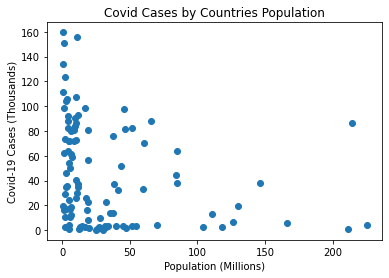

In [5]:
df_popclone = df.copy()
df_popclone = df_popclone.loc[df_popclone.population < 400000000, :]

plt.scatter(df_popclone.population / 1000000, df_popclone.total_cases_per_1m_population / 1000)
plt.title("Covid Cases by Countries Population")
plt.xlabel("Population (Millions)")
plt.ylabel("Covid-19 Cases (Thousands)")
plt.show()

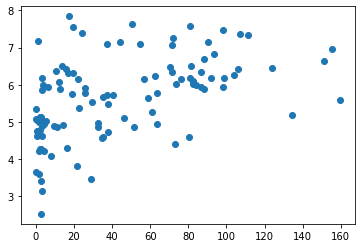

In [6]:
# Looking at relationship between cases and happiness
plt.scatter(df.total_cases_per_1m_population / 1000, df.ladder_score)
plt.show()

In [15]:
# looking for a regression on the above graph
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(df.total_cases_per_1m_population, df.ladder_score)
regress_values = df.total_cases_per_1m_population * slope + intercept
line_eq = f'y = {round(slope,6)} x + {round(intercept,2)}'
r_str = f'r = {round(rvalue,3)}'
p_str = f'p = {round(pvalue,10)}'

print(pvalue)
# looking at correlation coefficient
r = st.pearsonr(df.total_cases_per_1m_population, df.ladder_score)
r_sq = r[0]**2

print(f'The correlation coefficient for Covid Cases and Happiness rating is {round(rvalue,2)}\n')
print(f'The coefficient of determination for Covid Cases and Happiness rating is {round(r_sq,2)}\n')
print(line_eq)

1.0296071735857432e-07
The correlation coefficient for Covid Cases and Happiness rating is 0.49

The coefficient of determination for Covid Cases and Happiness rating is 0.24

y = 1.3e-05 x + 5.08


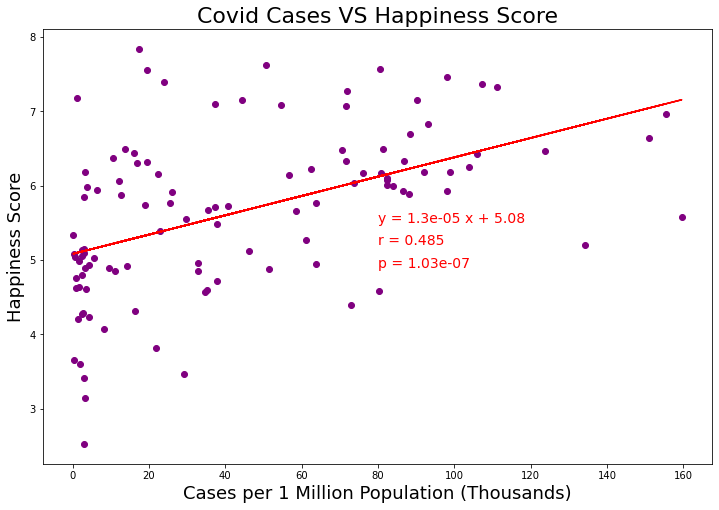

In [16]:
# Plotting with with linear regression line

plt.figure(figsize=(12,8))

plt.scatter(df.total_cases_per_1m_population / 1000, df.ladder_score, color='purple')
plt.plot(df.total_cases_per_1m_population / 1000, regress_values, color='red')

plt.title('Covid Cases VS Happiness Score', fontsize=22)
plt.xlabel('Cases per 1 Million Population (Thousands)', fontsize=18)
plt.ylabel('Happiness Score', fontsize=18)

plt.annotate(line_eq, (80, 5.5), color='red', fontsize=14)
plt.annotate(r_str, (80, 5.2), color='red', fontsize=14)
plt.annotate(p_str, (80, 4.9), color='red', fontsize=14)

plt.savefig('../Images/covidvhappiness.png')

plt.show()